# Weapon Stats

## Setting Up

In [1]:
import pandas as pd
from scripts.probability import at_least_one

%run weapon_full_data.ipynb

## Damage

### Base Damage

How much damage a weapon can make in a single turn.

In [2]:
average_damage_mean = weapon_data[["weapon", "turn_damage_expected"]]
average_damage_mean = average_damage_mean.groupby("weapon").mean()

In [3]:
average_damage_max = weapon_data[["weapon", "turn_damage_max"]]
average_damage_max = average_damage_max.groupby("weapon").mean()

In [4]:
average_damage = pd.DataFrame()
average_damage["damage"] = average_damage_mean["turn_damage_expected"]
average_damage["up_to_max"] = average_damage_max["turn_damage_max"]
average_damage["up_to_max"] = average_damage.apply(lambda x: x["up_to_max"] - x["damage"], axis=1)
average_damage = average_damage.sort_values(by=["damage"])

Text(0, 0.5, 'Tus')

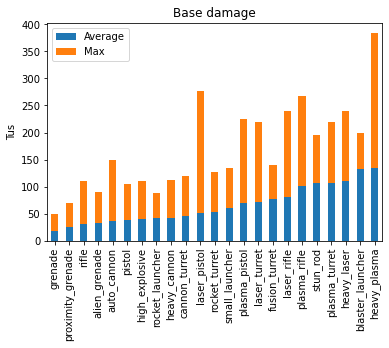

In [5]:
ax = average_damage.plot.bar(title="Base damage", stacked=True, legend=False)
ax.legend(["Average", "Max"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Tus")

### Penetrating Damage

In [6]:
average_damage_mean = weapon_data_aliens[["weapon", "turn_penetrating_damage_expected"]]
average_damage_mean = average_damage_mean.groupby("weapon").mean()

In [7]:
average_damage_max = weapon_data_aliens[["weapon", "turn_penetrating_damage_max"]]
average_damage_max = average_damage_max.groupby("weapon").mean()

In [8]:
average_damage = pd.DataFrame()
average_damage["damage"] = average_damage_mean["turn_penetrating_damage_expected"]
average_damage["up_to_max"] = average_damage_max["turn_penetrating_damage_max"]
average_damage["up_to_max"] = average_damage.apply(lambda x: x["up_to_max"] - x["damage"], axis=1)
average_damage = average_damage.sort_values(by=["damage"])

Text(0, 0.5, 'Tus')

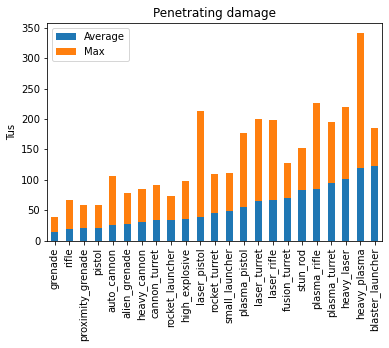

In [9]:
ax = average_damage.plot.bar(title="Penetrating damage", stacked=True, legend=False)
ax.legend(["Average", "Max"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Tus")

### Base vs Penetrating Damage

In [10]:
average_damage_mean = weapon_data_aliens[["weapon", "turn_damage_expected"]]
average_damage_mean = average_damage_mean.groupby("weapon").mean()

In [11]:
average_penetrating_damage_mean = weapon_data_aliens[["weapon", "turn_penetrating_damage_expected"]]
average_penetrating_damage_mean = average_penetrating_damage_mean.groupby("weapon").mean()

In [12]:
average_damage = pd.DataFrame()
average_damage["damage"] = average_penetrating_damage_mean["turn_penetrating_damage_expected"]
average_damage["up_to_max"] = average_damage_mean["turn_damage_expected"]
average_damage["up_to_max"] = average_damage.apply(lambda x: x["up_to_max"] - x["damage"], axis=1)
average_damage = average_damage.sort_values(by=["damage"])

Text(0, 0.5, 'Tus')

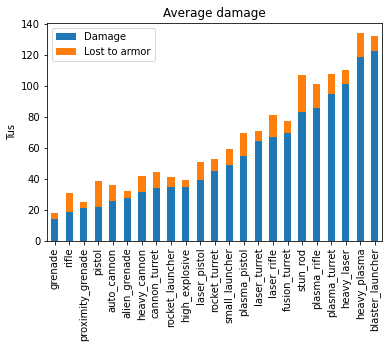

In [13]:
ax = average_damage.plot.bar(title="Average damage", stacked=True, legend=False)
ax.legend(["Damage", "Lost to armor"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Tus")

In [14]:
average_damage_mean = weapon_data_aliens[["weapon", "turn_damage_max"]]
average_damage_mean = average_damage_mean.groupby("weapon").mean()

In [15]:
average_penetrating_damage_mean = weapon_data_aliens[["weapon", "turn_penetrating_damage_max"]]
average_penetrating_damage_mean = average_penetrating_damage_mean.groupby("weapon").mean()

In [16]:
average_damage = pd.DataFrame()
average_damage["damage"] = average_penetrating_damage_mean["turn_penetrating_damage_max"]
average_damage["up_to_max"] = average_damage_mean["turn_damage_max"]
average_damage["up_to_max"] = average_damage.apply(lambda x: x["up_to_max"] - x["damage"], axis=1)
average_damage = average_damage.sort_values(by=["damage"])

Text(0, 0.5, 'Tus')

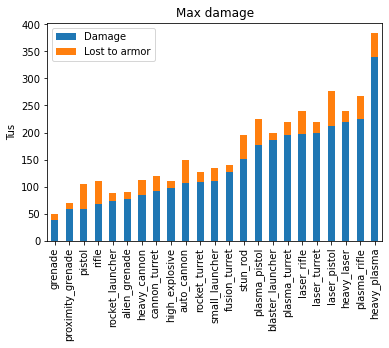

In [17]:
ax = average_damage.plot.bar(title="Max damage", stacked=True, legend=False)
ax.legend(["Damage", "Lost to armor"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Tus")

## Accuracy

In [18]:
chance_to_hit = weapon_data[ ["weapon", "average_chance_to_hit"] ]
chance_to_hit = chance_to_hit.groupby("weapon").mean()

In [19]:
chance_to_damage = weapon_data_aliens[ ["weapon", "chance_of_hit_and_penetrate"] ]
chance_to_damage = chance_to_damage.groupby(["weapon"]).mean()

In [20]:
chance_impact = chance_to_damage.merge(chance_to_hit, on="weapon")
chance_impact = chance_impact.sort_values(by=["chance_of_hit_and_penetrate"])
chance_impact = chance_impact.rename({"chance_of_hit_and_penetrate": "to_damage", "average_chance_to_hit": "to_not_damage"}, axis=1)
chance_impact["to_not_damage"] = chance_impact.apply(lambda x: x["to_not_damage"] - x["to_damage"], axis=1)
chance_impact = chance_impact.sort_values(by=["to_damage"])

Text(0, 0.5, 'Chance')

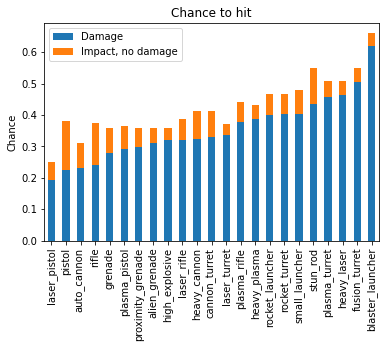

In [21]:
ax = chance_impact.plot.bar(title="Chance to hit", stacked=True, legend=False)
ax.legend(["Damage", "Impact, no damage"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance")

## Ammo

In [22]:
weapon_ammo = weapon_data[["weapon", "capacity"]]
weapon_ammo = weapon_ammo.rename(columns={"capacity": "ammo"})
weapon_ammo = weapon_ammo.groupby("weapon").max()
weapon_ammo = weapon_ammo.sort_values(by=["ammo"])

# Remove weapons with unlimited ammo
weapon_ammo = weapon_ammo[weapon_ammo["ammo"] < 255]

weapon_ammo

,ammo
weapon,
alien_grenade,1.0
rocket_launcher,1.0
proximity_grenade,1.0
high_explosive,1.0
grenade,1.0
small_launcher,1.0
blaster_launcher,1.0
heavy_cannon,6.0
rocket_turret,8.0


Text(0, 0.5, 'Shots')

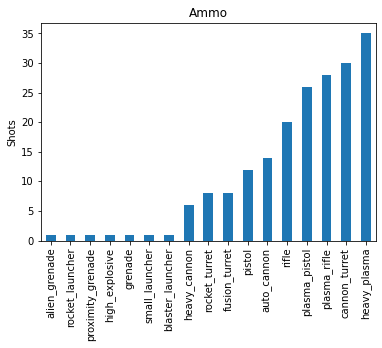

In [23]:
ax = weapon_ammo.plot.bar(title="Ammo", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Shots")

## Damage Per Clip

In [24]:
damage_per_clip = weapon_data[["weapon", "clip_damage"]]
damage_per_clip = damage_per_clip.groupby("weapon").max()
damage_per_clip = damage_per_clip.dropna()

In [25]:
penetrating_damage_per_clip = weapon_data_aliens[["weapon", "clip_penetrating_damage"]]
penetrating_damage_per_clip = penetrating_damage_per_clip.groupby("weapon").max()
penetrating_damage_per_clip = penetrating_damage_per_clip.dropna()

In [26]:
damage_per_clip = penetrating_damage_per_clip.merge(damage_per_clip, on="weapon")
damage_per_clip = damage_per_clip.sort_values(by=["clip_penetrating_damage"])
damage_per_clip = damage_per_clip.rename({"clip_penetrating_damage": "damage", "clip_damage": "up_to_max"}, axis=1)
damage_per_clip["up_to_max"] = damage_per_clip.apply(lambda x: x["up_to_max"] - x["damage"], axis=1)
damage_per_clip = damage_per_clip.sort_values(by=["damage"])
# Remove weapons with unlimited ammo
damage_per_clip = damage_per_clip[damage_per_clip["damage"] < 10000]

Text(0, 0.5, 'Chance')

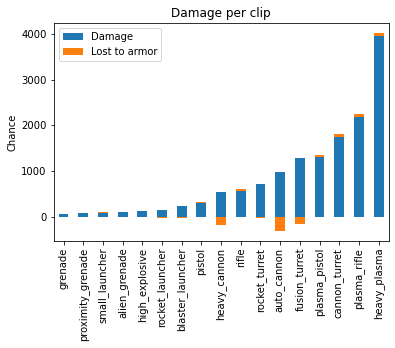

In [27]:
ax = damage_per_clip.plot.bar(title="Damage per clip", stacked=True)
ax.legend(["Damage", "Lost to armor"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance")

## Time Units

How much does it cost each use of a weapon? Cost is measured in Time Units.

In [28]:
time_units_max = weapon_data[["weapon", "time_units"]]
time_units_max = time_units_max.groupby("weapon").max()

In [29]:
time_units_average = weapon_data[["weapon", "time_units"]]
time_units_average = time_units_average.groupby("weapon").mean()

In [30]:
time_units = time_units_average.merge(time_units_max, on="weapon")
time_units = time_units.rename(columns={"time_units_x": "time_units", "time_units_y": "up_to_max"})
time_units["up_to_max"] = time_units.apply(lambda x: x["up_to_max"] - x["time_units"], axis=1)
time_units = time_units.sort_values(by=["time_units"])
time_units

,time_units,up_to_max
weapon,,
pistol,24.000000,6.000000
stun_rod,30.000000,0.000000
laser_pistol,33.333333,21.666667
laser_rifle,36.333333,13.666667
plasma_pistol,40.000000,20.000000
heavy_plasma,41.666667,18.333333
plasma_rifle,42.000000,18.000000
plasma_turret,45.000000,15.000000
heavy_laser,46.500000,13.500000


Text(0, 0.5, 'TUs')

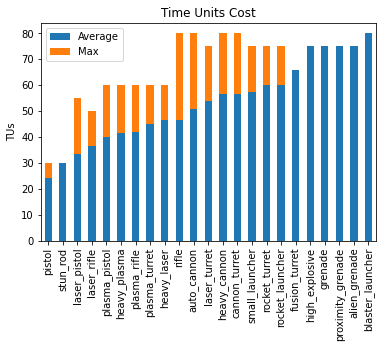

In [31]:
ax = time_units.plot.bar(title="Time Units Cost", stacked=True)
ax.legend(["Average", "Max"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("TUs")

## Shots Per Turn

Supposing all the attacks are done on auto, or the highest rate of fire setting.

In [32]:
shots_per_turn_max = weapon_data[["weapon", "turn_max_shots"]]
shots_per_turn_max = shots_per_turn_max.groupby("weapon").max()

In [33]:
shots_per_turn_average = weapon_data[["weapon", "turn_max_shots"]]
shots_per_turn_average = shots_per_turn_average.groupby("weapon").mean()
shots_per_turn_average["turn_max_shots"] = shots_per_turn_average.apply(lambda x: int(x["turn_max_shots"]), axis=1)

In [34]:
shots_per_turn = shots_per_turn_average.merge(shots_per_turn_max, on="weapon")
shots_per_turn = shots_per_turn.rename(columns={"turn_max_shots_x": "turn_shots", "turn_max_shots_y": "up_to_max"})
shots_per_turn["up_to_max"] = shots_per_turn.apply(lambda x: x["up_to_max"] - x["turn_shots"], axis=1)
shots_per_turn = shots_per_turn.sort_values(by=["turn_shots"])

Text(0, 0.5, 'Shots')

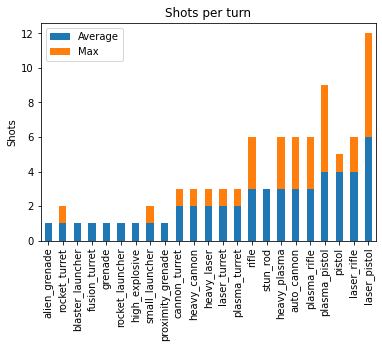

In [35]:
ax = shots_per_turn.plot.bar(title="Shots per turn", stacked=True)
ax.legend(["Average", "Max"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Shots")

## Turns of Sustained Fire

Weapons with unlimited ammo are not taken into account.

In [36]:
turns_sustained_fire_max = weapon_data[["weapon", "turns_to_reload"]]
turns_sustained_fire_max = turns_sustained_fire_max.groupby("weapon").max()

# Remove weapons with unlimited ammo
turns_sustained_fire_max = turns_sustained_fire_max[turns_sustained_fire_max["turns_to_reload"] < 70]

In [37]:
turns_sustained_fire_average = weapon_data[["weapon", "turns_to_reload"]]
turns_sustained_fire_average = turns_sustained_fire_average.groupby("weapon").mean()

# Remove weapons with unlimited ammo
turns_sustained_fire_average = turns_sustained_fire_average[turns_sustained_fire_average["turns_to_reload"] < 70]

In [38]:
turns_sustained_fire = turns_sustained_fire_average.merge(turns_sustained_fire_max, on="weapon")
turns_sustained_fire = turns_sustained_fire.rename(columns={"turns_to_reload_x": "turns_sustained_fire", "turns_to_reload_y": "up_to_max"})
turns_sustained_fire["up_to_max"] = turns_sustained_fire.apply(lambda x: x["up_to_max"] - x["turns_sustained_fire"], axis=1)
turns_sustained_fire = turns_sustained_fire.sort_values(by=["turns_sustained_fire"])

Text(0, 0.5, 'Turns')

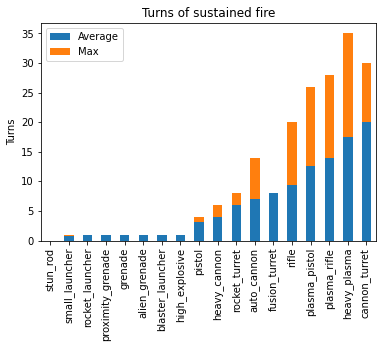

In [39]:
ax = turns_sustained_fire.plot.bar(title="Turns of sustained fire", stacked=True)
ax.legend(["Average", "Max"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Turns")

## Damage Per Time Unit

### Base Damage Per Time Unit

In [40]:
damage_per_tu_max = weapon_data[["weapon", "damage_per_time_unit"]]
damage_per_tu_max = damage_per_tu_max.groupby("weapon").max()

In [41]:
damage_per_tu_average = weapon_data[["weapon", "damage_per_time_unit"]]
damage_per_tu_average = damage_per_tu_average.groupby("weapon").mean()

In [42]:
damage_per_tu = damage_per_tu_average.merge(damage_per_tu_max, on="weapon")
damage_per_tu = damage_per_tu.rename(columns={"damage_per_time_unit_x": "damage_per_time_unit", "damage_per_time_unit_y": "up_to_max"})
damage_per_tu["up_to_max"] = damage_per_tu.apply(lambda x: x["up_to_max"] - x["damage_per_time_unit"], axis=1)
damage_per_tu = damage_per_tu.sort_values(by=["damage_per_time_unit"])

Text(0, 0.5, 'Ratio')

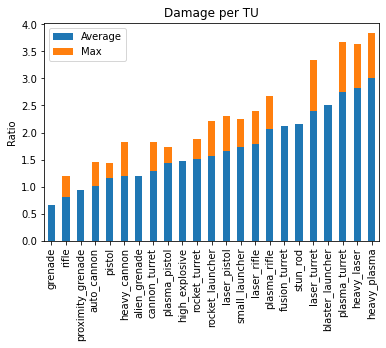

In [43]:
ax = damage_per_tu.plot.bar(title="Damage per TU", stacked=True)
ax.legend(["Average", "Max"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")

### Penetrating Damage Per Time Unit

In [44]:
damage_per_tu_max = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
damage_per_tu_max = damage_per_tu_max.groupby("weapon").max()

In [45]:
damage_per_tu_average = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
damage_per_tu_average = damage_per_tu_average.groupby("weapon").mean()

In [46]:
damage_per_tu = damage_per_tu_average.merge(damage_per_tu_max, on="weapon")
damage_per_tu = damage_per_tu.rename(columns={"penetrating_damage_per_time_unit_x": "damage_per_time_unit", "penetrating_damage_per_time_unit_y": "up_to_max"})
damage_per_tu["up_to_max"] = damage_per_tu.apply(lambda x: x["up_to_max"] - x["damage_per_time_unit"], axis=1)
damage_per_tu = damage_per_tu.sort_values(by=["damage_per_time_unit"])

Text(0, 0.5, 'Ratio')

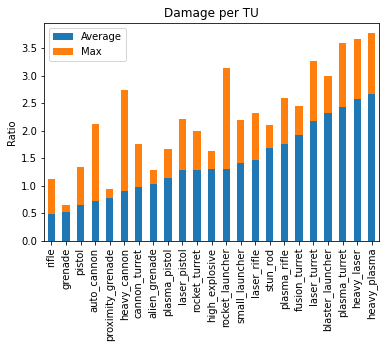

In [47]:
ax = damage_per_tu.plot.bar(title="Damage per TU", stacked=True)
ax.legend(["Average", "Max"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")

### Difference

In [48]:
damage_per_tu_base = weapon_data[["weapon", "damage_per_time_unit"]]
damage_per_tu_base = damage_per_tu_base.groupby("weapon").mean()

In [49]:
damage_per_tu_final = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
damage_per_tu_final = damage_per_tu_final.groupby("weapon").mean()

In [50]:
damage_per_tu = damage_per_tu_final.merge(damage_per_tu_base, on="weapon")
damage_per_tu = damage_per_tu.rename(columns={"penetrating_damage_per_time_unit": "damage_per_time_unit", "damage_per_time_unit": "up_to_max"})
damage_per_tu["up_to_max"] = damage_per_tu.apply(lambda x: x["up_to_max"] - x["damage_per_time_unit"], axis=1)
damage_per_tu = damage_per_tu.sort_values(by=["damage_per_time_unit"])

Text(0, 0.5, 'Ratio')

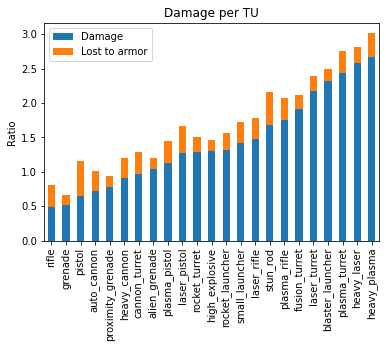

In [51]:
ax = damage_per_tu.plot.bar(title="Damage per TU", stacked=True)
ax.legend(["Damage", "Lost to armor"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")

## Hits to Kill

In [52]:
hits_to_kill_average = weapon_data_aliens[["weapon", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["weapon"]).mean()
hits_to_kill_average["hits_to_kill"] = hits_to_kill_average.apply(lambda x: math.ceil(x["hits_to_kill"]), axis=1)
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

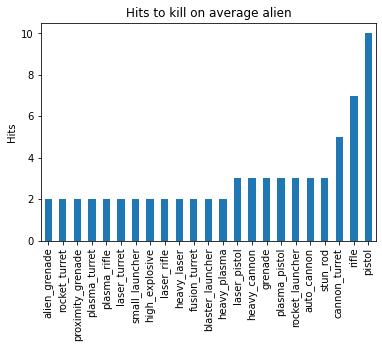

In [53]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Expected Kills in a Turn

In [54]:
expected_kills = weapon_data_aliens[["weapon", "turn_expected_kills"]]
expected_kills = expected_kills.groupby(["weapon"]).mean()
expected_kills["turn_expected_kills"] = expected_kills.apply(lambda x: math.ceil(x["turn_expected_kills"]), axis=1)
expected_kills = expected_kills.sort_values(by=["turn_expected_kills"])

Text(0, 0.5, 'Kills')

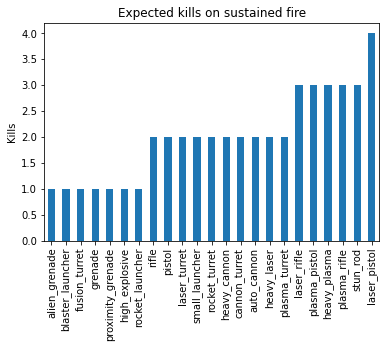

In [55]:
ax = expected_kills.plot.bar(title="Expected kills on sustained fire", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Kills")

## Overkill

In [56]:
overkill = weapon_data_aliens[["weapon", "overkill"]]
overkill = overkill.groupby(["weapon"]).mean()
overkill = overkill.sort_values(by=["overkill"])

Text(0, 0.5, 'Overkill')

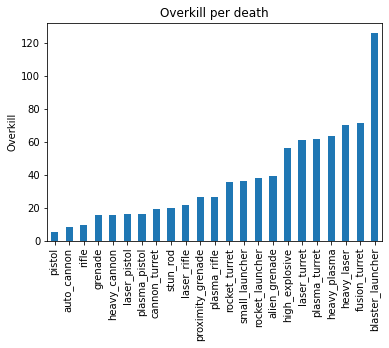

In [57]:
ax = overkill.plot.bar(title="Overkill per death", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Overkill")

### Time Units Wasted on Overkill

In [58]:
overkill = weapon_data_aliens[["weapon", "overkill_per_time_unit"]]
overkill = overkill.groupby(["weapon"]).mean()
overkill = overkill.sort_values(by=["overkill_per_time_unit"])

Text(0, 0.5, 'TUs')

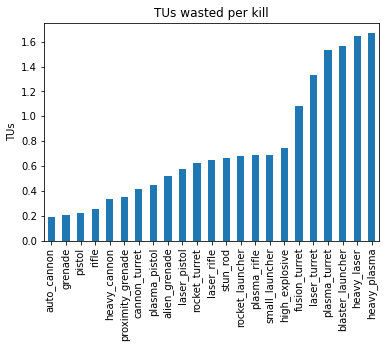

In [59]:
ax = overkill.plot.bar(title="TUs wasted per kill", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("TUs")

## Hitting With Burst vs Hitting With Snapshot

In [60]:
at_least_one_compare = weapon_data[["weapon", "fire_mode", "burst", "accuracy"]]
at_least_one_compare = at_least_one_compare.query("fire_mode == 'snapshot' | fire_mode == 'auto'")
at_least_one_compare = at_least_one_compare.groupby(["weapon", "fire_mode"]).mean()

In [61]:
at_least_one_compare["chance"] = at_least_one_compare.apply(lambda x: at_least_one(x["accuracy"]/100, x["burst"]), axis=1)
at_least_one_compare["chance"] = pd.to_numeric(at_least_one_compare["chance"])
at_least_one_compare = at_least_one_compare.drop(["burst", "accuracy"], axis=1)
at_least_one_compare = at_least_one_compare.reset_index()
at_least_one_compare = at_least_one_compare.set_index("weapon")

In [62]:
at_least_one_compare_auto = at_least_one_compare[at_least_one_compare["fire_mode"] == "auto"][["chance"]]
at_least_one_compare_snap = at_least_one_compare[at_least_one_compare["fire_mode"] == "snapshot"][["chance"]]
at_least_one_compare = at_least_one_compare_snap.merge(at_least_one_compare_auto, on="weapon")
at_least_one_compare = at_least_one_compare.rename(columns={"chance_x": "chance", "chance_y": "up_to_max"})
at_least_one_compare["up_to_max"] = at_least_one_compare.apply(lambda x: x["up_to_max"] - x["chance"], axis=1)
at_least_one_compare = at_least_one_compare.sort_values(by=["weapon"])

Text(0, 0.5, 'Chance')

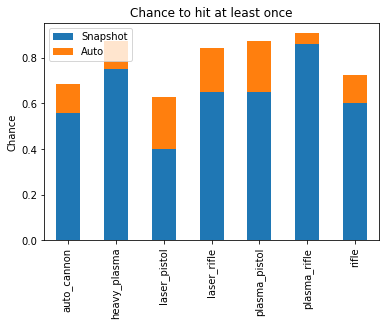

In [63]:
ax = at_least_one_compare.plot.bar(title="Chance to hit at least once", stacked=True)
ax.legend(["Snapshot", "Auto"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance")